# **Predicting Employee Retention**

### Problem Statement

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organisation has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.

High retention rates are crucial for maintaining knowledge continuity, reducing recruitment costs, and enhancing overall employee morale. The company aims to leverage its historical employee data to gain insights into the drivers of employee commitment and loyalty, enabling them to replicate these success factors across the organisation.

### Business Objective

In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on data such as demographic details, job satisfaction scores, performance metrics, and tenure. The goal is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps for successfully completing this assignment.
1. Data Preparation
2. Data Cleaning
3. Train Validation Split
4. EDA on train
5. Validate/differentiate EDA on train with EDA on validation [Optional]
6. Feature Engineering
7. Model Building
8. Predicting and Model Evaluation




## Data Understanding & Dictionary

The [employee data](https://drive.google.com/drive/folders/14smGcBRtMGn-pxXe9YLSMr3e1AM4pQSj?usp=drive_link) has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company, encoded as 0 (stayed) and 1 (Left).</td>
    </tr>
  </tbody>
</table>


## Step 1: Data Preparation  

In this step, we would load the dataset and look at basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

1.0 Import Libraries

In [4]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd

1.1 Load the Data

In [6]:
# Load the dataset
employee_data = pd.read_csv('Employee_data.csv')

In [7]:
# Look at the first few entries
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [8]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [9]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

1.2 Look at basic statistics

In [10]:
# Check the summary of the dataset
employee_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


1.3 Look at the data type of columns

In [11]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

There are few categorical variables present in this dataset for which we need to create dummy variables. Also, there are few null values present as well, so we need to treat them accordingly.

## Step 2: Data Cleaning <font color = red>[20 marks]</font>

In this step, we would treat the data for missing values and create dummy variables for categorical columns.

##### 2.1 Handling Missing Values <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [12]:
# Check the number of missing values in each column
employee_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [13]:
# Let's now check the percentage of missing values in each column
round(100*(employee_data.isnull().sum()/len(employee_data.index)), 2)

Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64

Since now the number of null values present in the columns are quite small (less than 5%) we can simply drop the rows in which these null values are present.

2.1.2 Treating columns with missing values <font color="red">[4 Marks]</font>

In [14]:
# Handle the null value rows in the column 'Distance from Home'
employee_data = employee_data[~pd.isnull(employee_data['Distance from Home'])]

In [15]:
# Handle the null value rows in the column 'Company Tenure (In Months)'
employee_data = employee_data[~pd.isnull(employee_data['Company Tenure (In Months)'])]

In [16]:
# Check the null values again
employee_data.isnull().sum()

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

Now data doesn't have any null values. Let's check the percentage of rows that we have retained.

2.1.3 Percentage of data remaining after null values are removed <font color="red">[2 Mark]</font>

In [17]:
print('Row count after null values are removed: '+str(len(employee_data.index)))
print(len(employee_data.index)/74610)

Row count after null values are removed: 70635
0.9467229593888219


We still have around 95% of the rows, so we are good to proceed.

In [18]:
# Let's look at the dataset again
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


Let's look at the values of categorical columns to determine if any value or column needs to be treated in order to clean the dataset.

##### 2.2 Removing redundant values from categorical columns <font color = red>[5 marks]</font>

Let's look at unique values present in categorical columns

In [19]:
# Get the value counts of all the columns
for column in employee_data:
    print(employee_data[column].astype('category').value_counts())
    print('___________________________________________________')

Employee ID
26272    2
23027    2
21299    2
28197    2
36968    2
        ..
74477    1
74478    1
74479    1
74480    1
9        1
Name: count, Length: 70558, dtype: int64
___________________________________________________
Age
34    1775
53    1757
40    1748
30    1738
55    1737
45    1734
38    1730
43    1728
35    1722
39    1717
49    1711
47    1709
32    1708
21    1708
36    1706
46    1704
19    1701
56    1699
27    1698
41    1696
59    1686
42    1685
22    1682
26    1679
33    1677
58    1667
20    1664
54    1652
57    1649
24    1649
29    1649
25    1646
37    1636
31    1633
51    1632
50    1631
44    1630
28    1629
52    1615
23    1612
18    1610
48    1596
Name: count, dtype: int64
___________________________________________________
Gender
Male      38700
Female    31935
Name: count, dtype: int64
___________________________________________________
Years at Company
5     2911
1     2907
2     2883
8     2856
10    2830
9     2806
7     2803
6     2800
3     27

We can see that none of the columns have any redundant value which would require special treatment.

In [20]:
# Let's look at the dataset again
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


Since `Employee ID` column will not be used in prediction, so we can remove it.

##### 2.3 Dropping Redundant Columns <font color = red>[5 marks]</font>

In [21]:
# Dropping Employee ID column as it is not required for modelling
employee_data.drop(columns = 'Employee ID', inplace = True)

In [22]:
# Let's look at first few rows of data again.
employee_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## Step 3: Train Validation Split <font color = red>[5 marks]</font>

3.1 Import required libraries <font color="red">[1 Mark]</font>

In [23]:
# Import the required library
from sklearn.model_selection import train_test_split

3.2 Create X variable for Independent Variables<font color = red>[1 Mark]</font>

In [24]:
# Put all the feature variables in X
X = employee_data.drop(columns='Attrition')
X.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Medium
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Low
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,74.0,No,No,No,Poor,Low
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,50.0,Yes,No,No,Good,Medium
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Medium


3.3 Create y variable for dependent/outcome column <font color="red">[1 Mark]</font>

In [25]:
# Put the target variable in y
y = employee_data['Attrition']
y.head()

0    Stayed
1    Stayed
2    Stayed
3    Stayed
4    Stayed
Name: Attrition, dtype: object

3.4 Split X and y into training and validation sets <font color="red">[2 Marks]</font>

In [26]:
# Split the dataset into 70% train and 30% test
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 4: EDA on training set <font color = red>[20 marks]</font>

##### 4.1 Univariate Analysis <font color = red>[6 marks]</font>

Let's look at the distribution of numerical columns within training data.

4.1.1 Select numerical columns from training data <font color = "red">[1 Marks]</font>

In [27]:
# Select numerical columns
numerical_columns = X_train.select_dtypes(include=["number"]).columns

4.1.2 Plot Distribution of numerical columns <font color = "red">[5 Marks]</font>

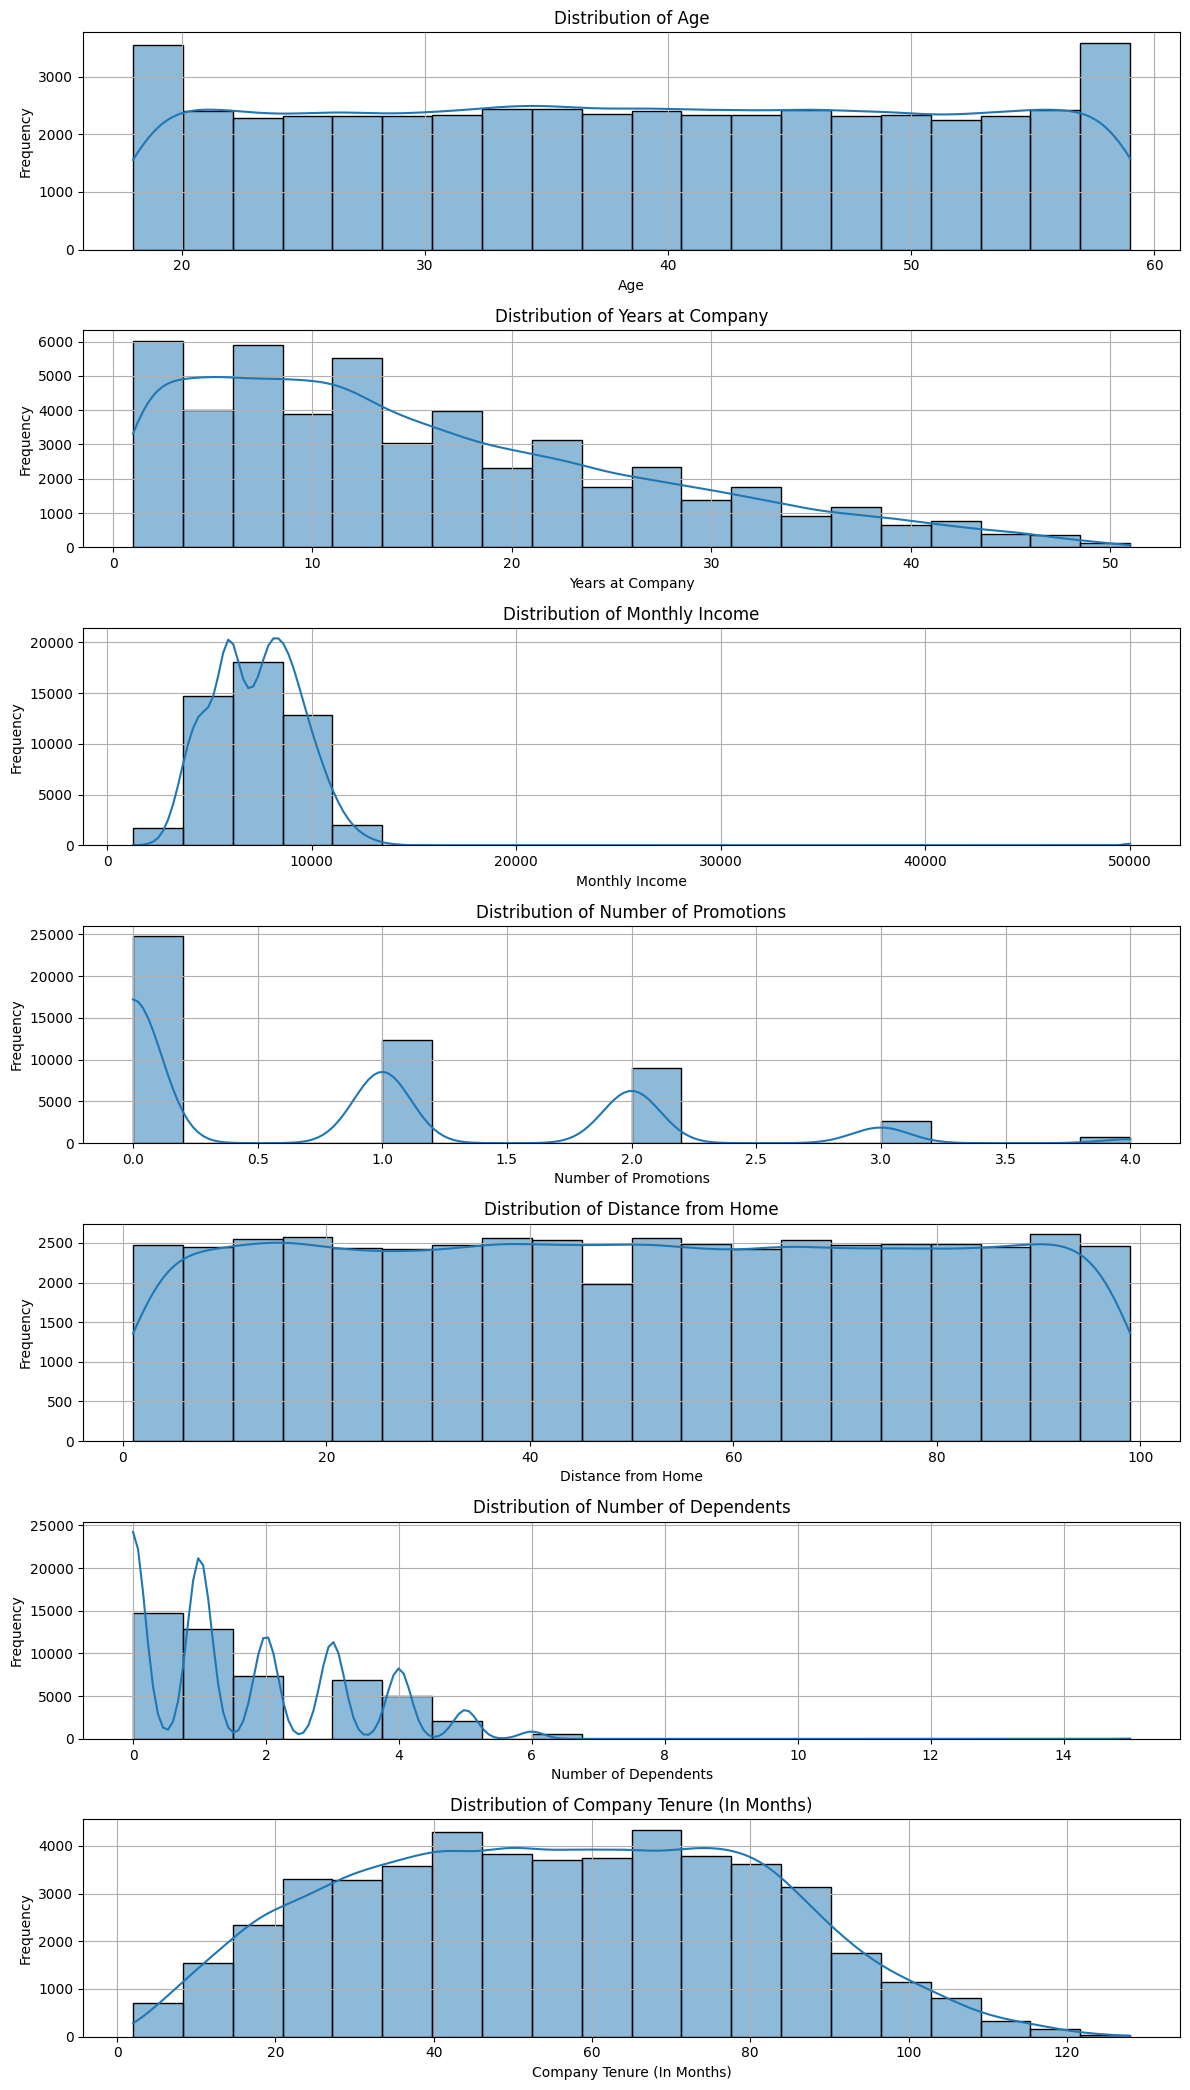

In [28]:
# Let's iterate over all numerical columns and plot their histogram to understand their distribution
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 3 * num_cols))

# Iterate over numerical columns and corresponding axes
for i, col in enumerate(numerical_columns):
    sns.histplot(X_train[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### 4.2 Correlations <font color="red">[4 Marks]</font>

Let's look at correlation among different numerical variables as well.

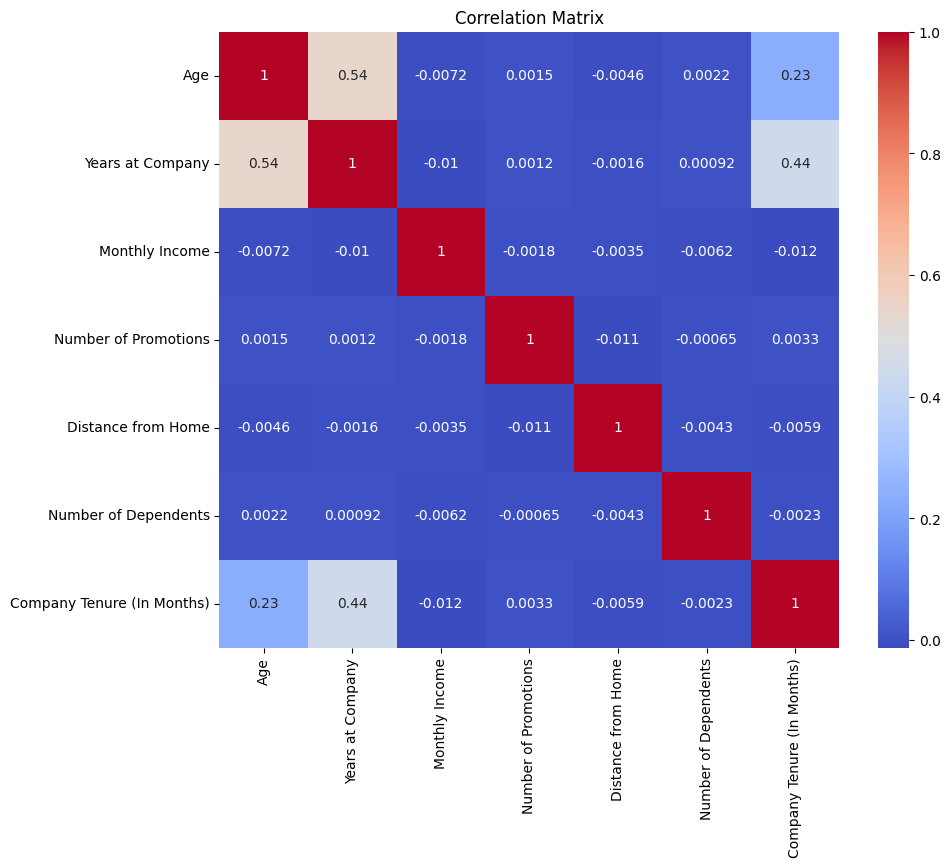

In [29]:
# Correlation matrix for numerical columns
correlation_matrix = X_train[numerical_columns].corr()

# Plotting Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We can see there is a correlation between age, years in company and company tenure. We would handle these correlations later when we perform feature selection and reiterate model basis VIF.

### 4.3 Data Balance <font color="red">[4 Marks]</font>

Let's look at the distribution of target variable in training set.

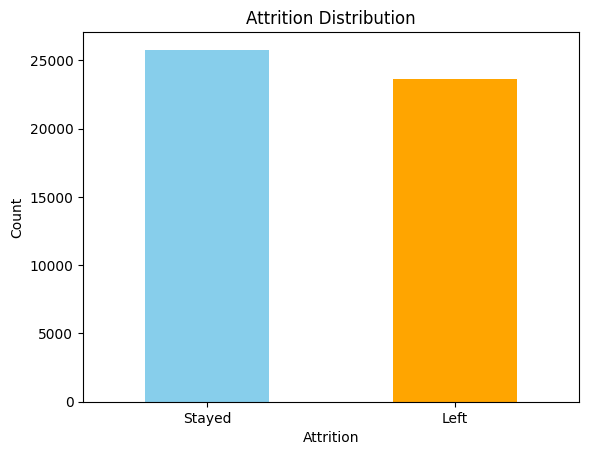

In [30]:
# Use value_counts() and plot a bar chart
y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We can see we have a balanced data, where we have good distribution of both Stayed and Left, and hence no resampling is required.

### 4.4 Categorical Column vs Attrition <font color="red">[6 Marks]</font>

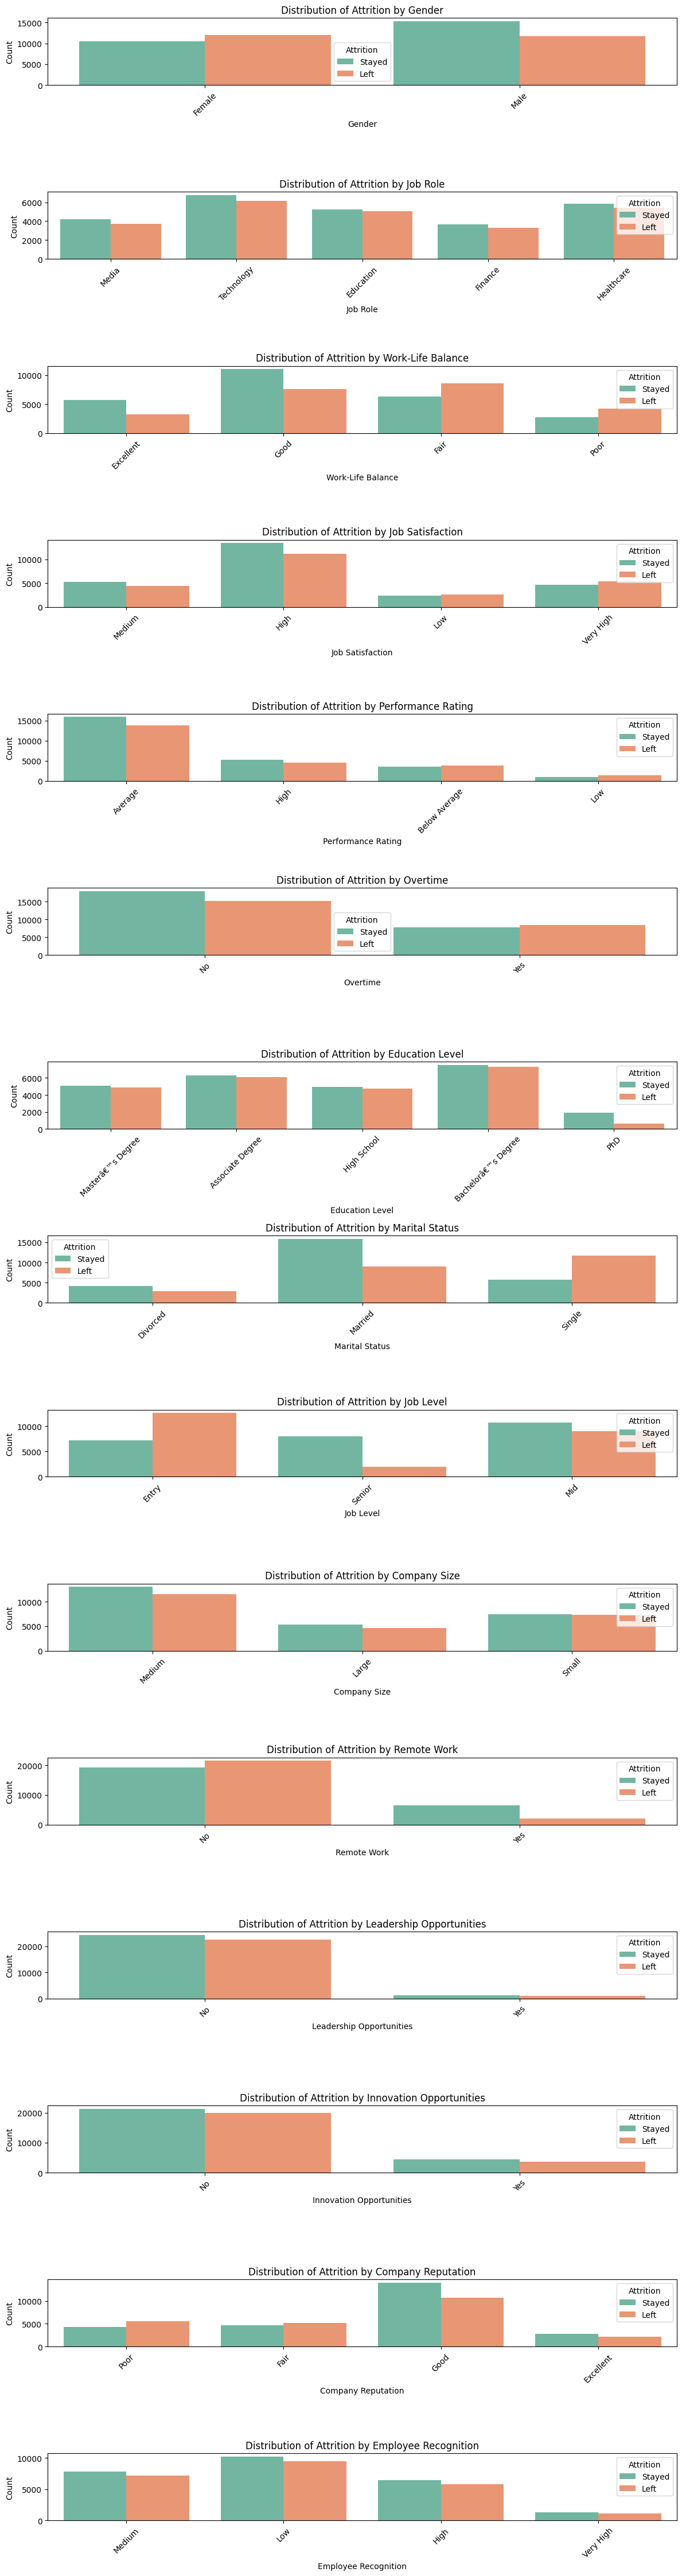

In [31]:
# Let's iterate over the categorical columns and look at the distribution on attrition column for values present in these columns.
plot_data = pd.concat([X_train,y_train])

target_col = 'Attrition'
categorical_columns = plot_data.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != target_col]

# Plot distribution for each categorical column
plt.figure(figsize=(12, 3 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=plot_data, x=col, hue=target_col, palette='Set2')
    plt.title(f'Distribution of {target_col} by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=target_col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## Step 5: Validate/differentiate EDA on train with EDA on validation <font color = red>[OPTIONAL]</font>

##### 5.1 Univariant Analysis

Let's look at the distribution of numerical columns within validation data.

5.1.1 Select numerical columns from validation data

In [32]:
# Select numerical columns
numerical_columns = X_validation.select_dtypes(include=["number"]).columns

5.1.2 Plot Distribution of numerical columns

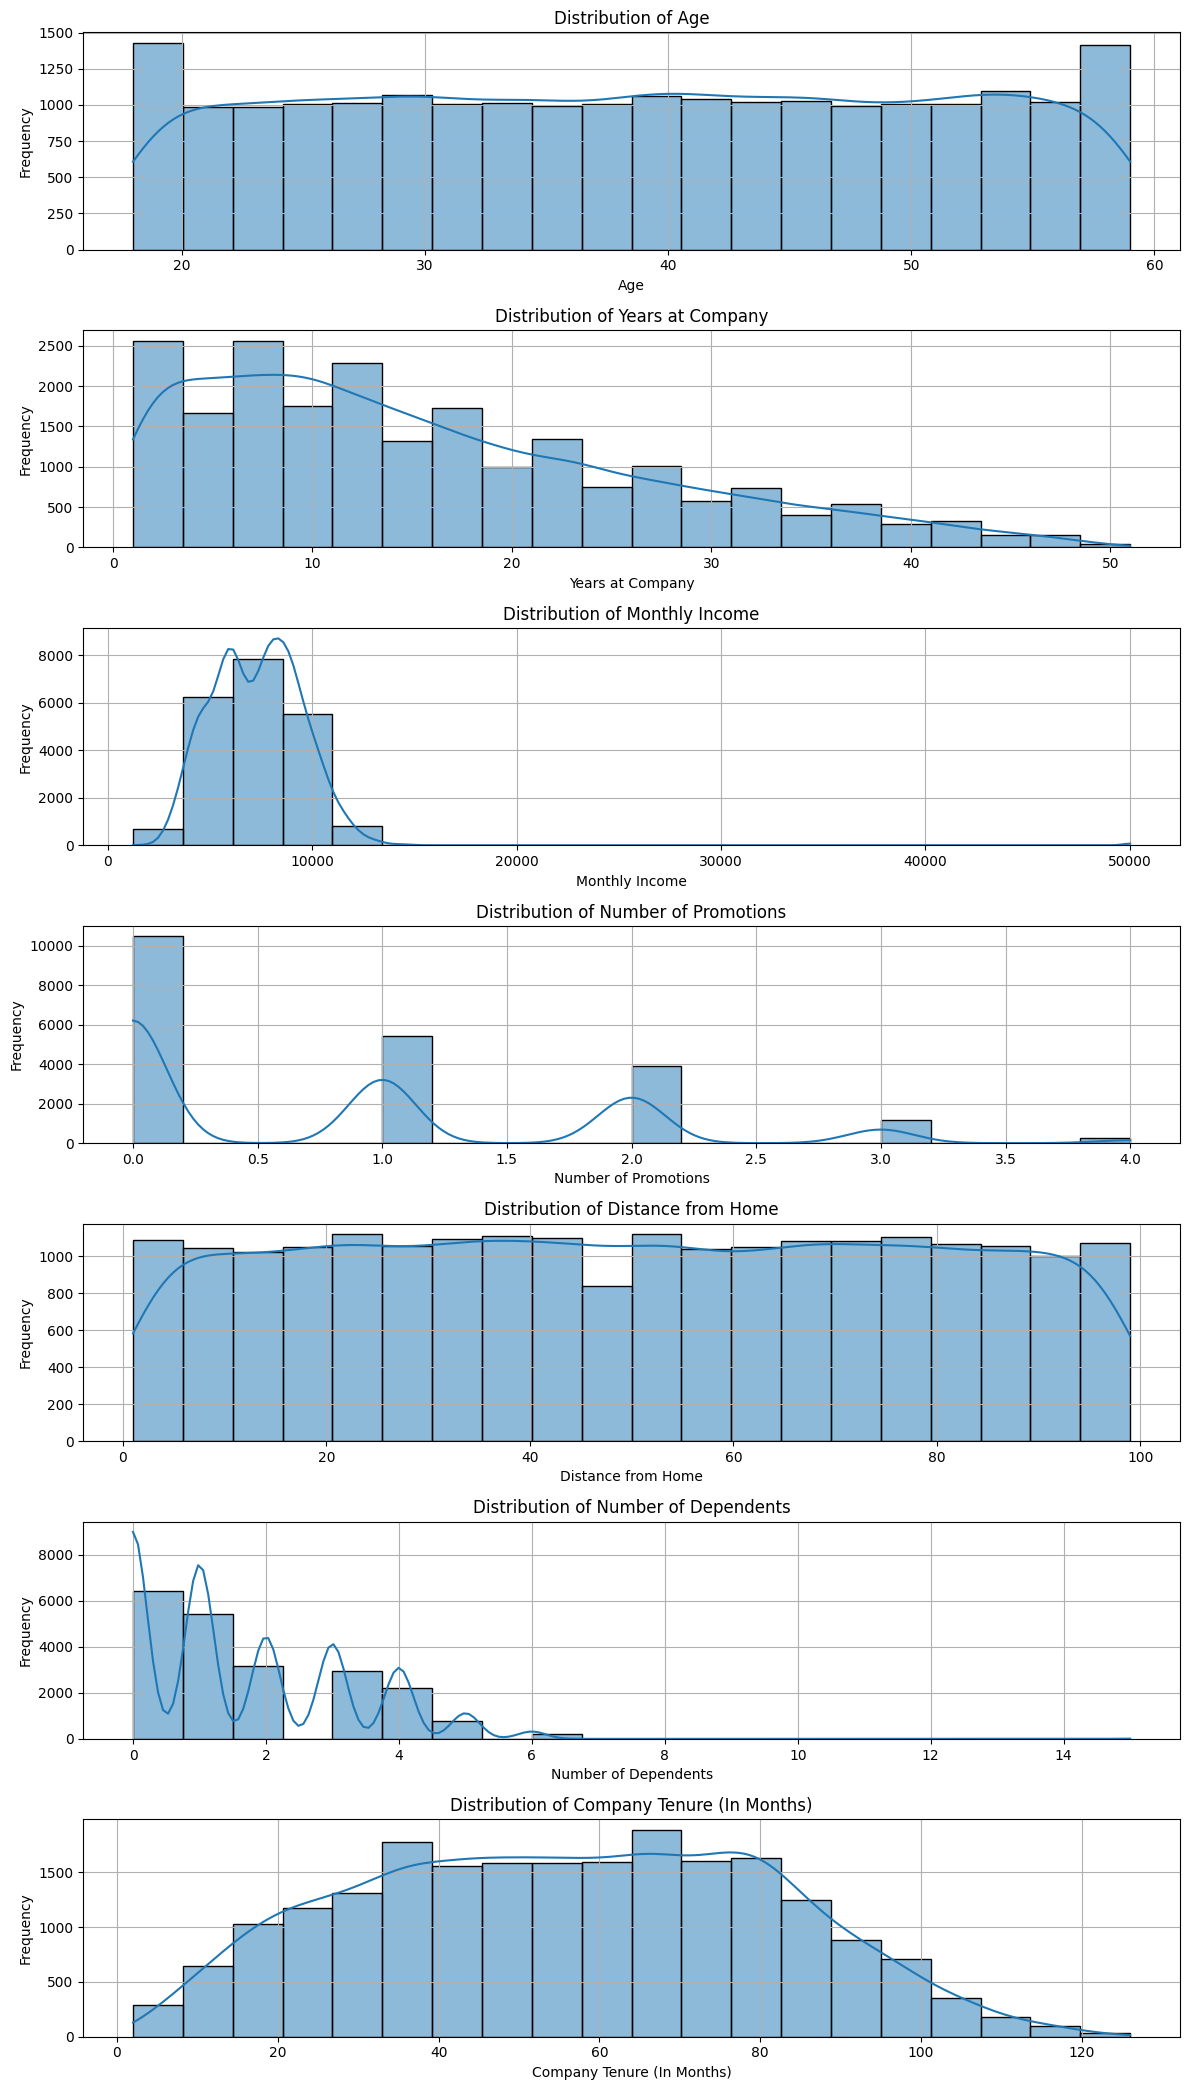

In [33]:
# Let's iterate over all numerical columns and plot their histogram to understand their distribution
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 3 * num_cols))

# Iterate over numerical columns and corresponding axes
for i, col in enumerate(numerical_columns):
    sns.histplot(X_validation[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

### 5.2 Correlations

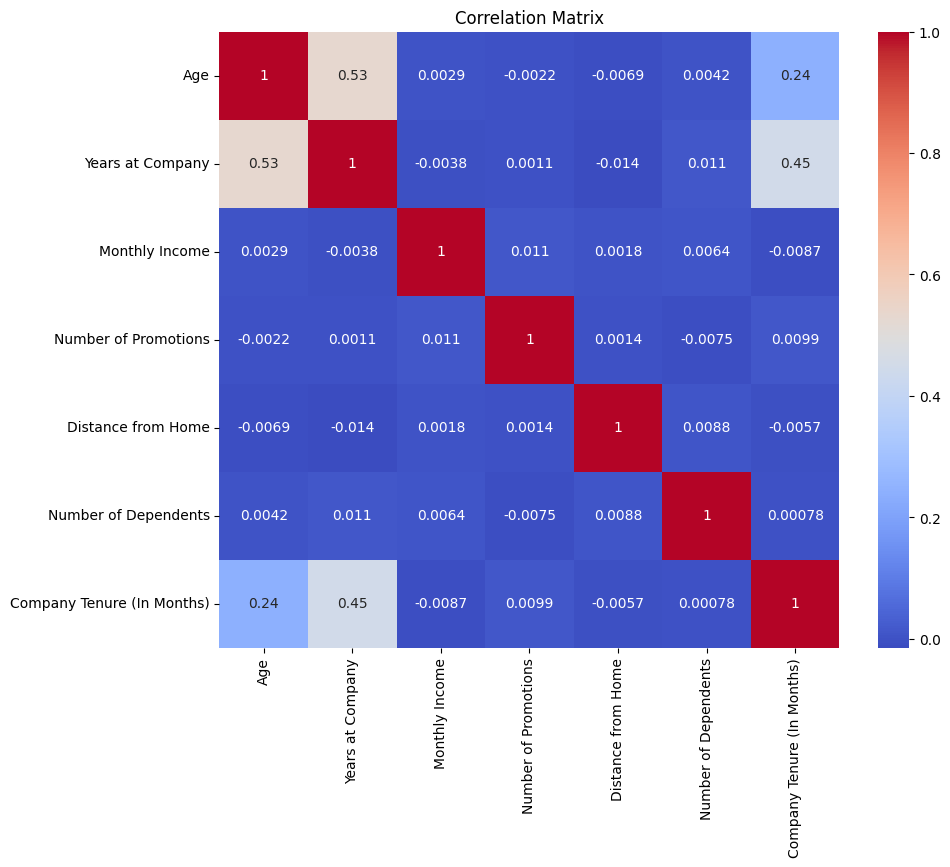

In [34]:
# Correlation matrix
correlation_matrix = X_validation[numerical_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We can see there is a correlation between age, years in company and company tenure. We would handle these correlations later when we perform feature selection and reiterate model basis VIF.

### 5.3 Data Balance

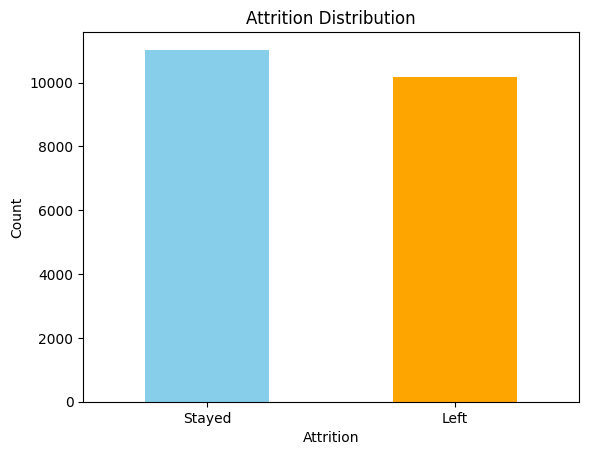

In [35]:
# Use value_counts() and plot a bar chart
y_validation.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We can see we have a balanced data, where we have good distribution of both Stayed and Left

### 5.4 Categorical Column vs Attrition

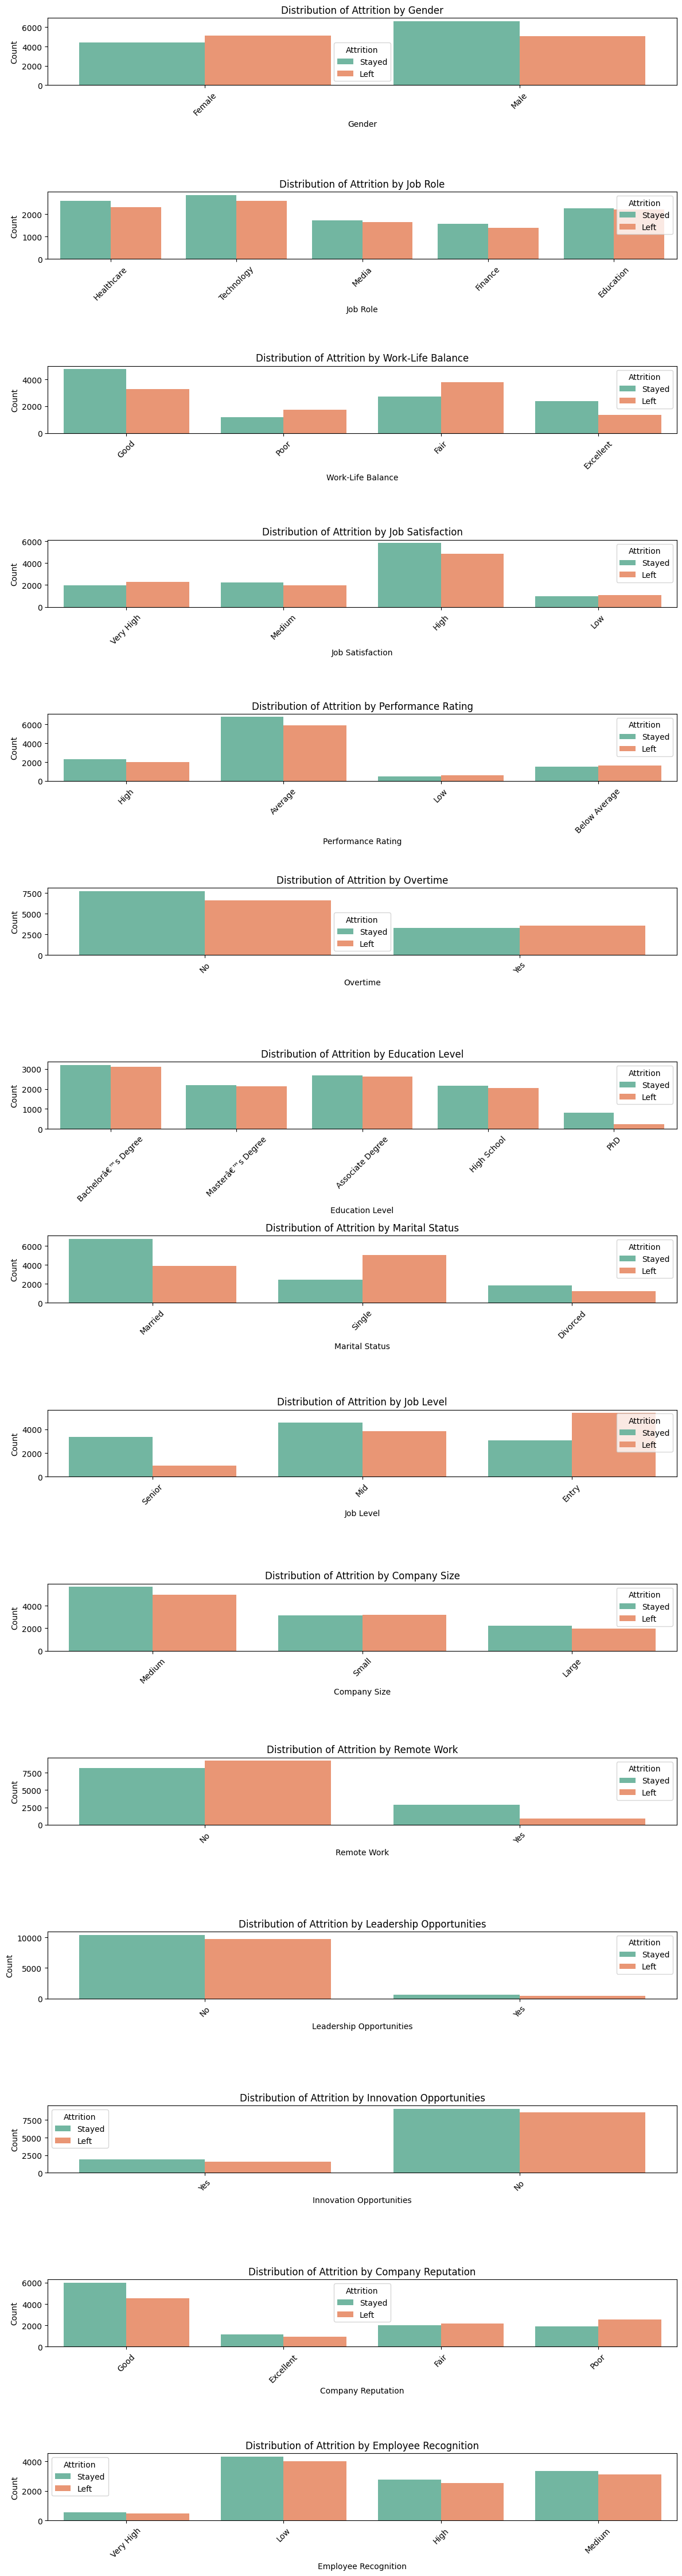

In [36]:
# Let's iterate over the categorical columns and look at the distribution on attrition column for values present in these columns.
plot_data = pd.concat([X_validation,y_validation])

# Categorical vs Numerical
target_col = 'Attrition'
categorical_columns = plot_data.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != target_col]

# Plot distribution for each categorical column
plt.figure(figsize=(12, 3 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=plot_data, x=col, hue=target_col, palette='Set2')
    plt.title(f'Distribution of {target_col} by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=target_col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

We can see that EDA of Validation is similar to EDA of Train set, indicating that we have a validation sample that is not much different from our Train set.

## Step 6: Feature Engineering <font color = red>[20 marks]</font>

**Dummy variable creation**

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

##### 6.1 Dummy variable creation for Independent columns <font color = red>[10 marks]</font>

6.1.1 Identify categorical columns <font color="red">[2 Marks]</font>

First let's identify columns where dummy variables are required. These are the categorical columns present in our data.

In [37]:
# Check the columns which are of type 'object', which are required to be converted into dummy variables
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create Dummy Variables for Independent columns for training set<font color="red">[4 Marks]</font>

Let's create dummy variables for above columns using get_dummies function.

In [38]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy = pd.get_dummies(X_train[categorical_columns], drop_first=True, dtype=int)

# Add the results to the master DataFrame
X_train = pd.concat([X_train, dummy], axis=1)

Now, let's drop the original categorical columns.

In [39]:
# Drop categorical columns
X_train.drop(columns=categorical_columns, inplace=True)

Let's look at our dataset again.

In [40]:
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
1516,39,25,5980,1,31.0,1,67.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3352,19,3,8663,2,58.0,4,78.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
59196,49,29,6195,0,66.0,1,89.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
71453,30,9,5753,1,59.0,3,17.0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
68890,26,15,5811,2,76.0,2,89.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


6.1.3 Create Dummy Variables for Independent columns for validation set<font color="red">[4 Marks]</font>

Let's create dummy variables for above columns using get_dummies function.

In [41]:
# Create dummy variables using the 'get_dummies' for independent columns
dummy_validation = pd.get_dummies(X_validation[categorical_columns], dtype=int)
dummy_validation = dummy_validation.reindex(columns=dummy.columns, fill_value=0)

# Add the results to the master DataFrame
X_validation = pd.concat([X_validation, dummy_validation], axis=1)

Now, let's drop the original categorical columns.

In [42]:
# Drop categorical columns
X_validation.drop(columns=categorical_columns, inplace=True)

Let's look at our dataset again.

In [43]:
X_validation.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
38726,22,5,8751,2,32.0,1,36.0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
24574,43,19,8585,2,38.0,4,35.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
21775,39,2,5462,1,40.0,1,49.0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
42700,30,11,7936,2,21.0,0,44.0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
60433,49,37,5413,1,13.0,0,78.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


##### 6.2 Dummy variable creation for Dependent column <font color = red>[10 marks]</font>

6.2.1 Create DataFrame for 'Attrition' column for training and validation set <font color = "red">[2 Marks]</font>

In [44]:
# Converting y_train and y_validation to DataFrame in order to create dummy variables
y_train = y_train.to_frame(name='Attrition')
y_validation = y_validation.to_frame(name='Attrition')

6.2.2 Create dummy variables for dependent column for training set<font color="red">[3 Marks]</font>

In [45]:
# Create dummy variables using the 'get_dummies' for dependent columns
y_train = pd.get_dummies(y_train['Attrition'], dtype=int, prefix = 'Attrition')

Let's look at first few rows of dummy created dependent columns

In [46]:
y_train.head()

,Attrition_Left,Attrition_Stayed
1516,0,1
3352,0,1
59196,1,0
71453,1,0
68890,1,0


6.2.3 Create dummy variable for dependent column for validation set <font color = "red">[3 Marks]</font>

In [47]:
# Create dummy variables using the 'get_dummies' for dependent columns
y_validation = pd.get_dummies(y_validation['Attrition'], dtype=int, prefix = 'Attrition')

Let's look at first few rows of dummy created dependent columns

In [48]:
y_validation.head()

,Attrition_Left,Attrition_Stayed
38726,0,1
24574,0,1
21775,0,1
42700,0,1
60433,1,0


Since we are creating a model to predict employee retention, hence we will drop the column 'Attrition_Left'

6.2.4 Drop redundant Column <font color="red">[2 Marks]</font>

In [49]:
y_train.drop(columns = 'Attrition_Left',inplace=True)
y_validation.drop(columns = 'Attrition_Left',inplace=True)

## Step 7: Model Building <font color = red>[40 marks]</font>

##### 7.1 Feature Scaling <font color = red>[2 marks]</font>

Numeric columns present in the dataset are in different scales. We need to apply feature scaling on them in order to bring them on same scale.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [50]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

7.1.2 Scale the numerical features <font color="red">[1 Mark]</font>

In [51]:
# Scale the numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['Age','Years at Company',
         'Monthly Income','Number of Promotions',
         'Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']] = scaler.fit_transform(X_train[['Age','Years at Company',
                                                                        'Monthly Income','Number of Promotions',
                                                                        'Distance from Home',
                                                                        'Number of Dependents',
                                                                        'Company Tenure (In Months)']])
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
1516,0.512195,0.48,0.096910,0.25,0.306122,0.066667,0.515873,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3352,0.024390,0.04,0.151916,0.50,0.581633,0.266667,0.603175,1,0,0,...,0,0,0,0,1,0,0,1,0,0
59196,0.756098,0.56,0.101318,0.00,0.663265,0.066667,0.690476,0,0,0,...,0,0,0,0,0,1,0,0,1,0
71453,0.292683,0.16,0.092257,0.25,0.591837,0.200000,0.119048,1,0,0,...,0,0,0,0,0,0,1,1,0,0
68890,0.195122,0.28,0.093446,0.50,0.765306,0.133333,0.690476,0,0,0,...,0,0,0,0,0,1,0,1,0,0


##### 7.2 Feature Selection <font color = red>[3 marks]</font>

As there are a lot of variables present in the dataset which is difficult to deal with, we will select a small set of features from this pool of variables using Recursive Feature Elimination (RFE).

7.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [52]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.2.2 Import RFE  and select 15 variables <font color="red">[1 Mark]</font>

In [53]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
# Display the features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', np.False_, np.int64(8)),
 ('Years at Company', np.True_, np.int64(1)),
 ('Monthly Income', np.False_, np.int64(20)),
 ('Number of Promotions', np.True_, np.int64(1)),
 ('Distance from Home', np.True_, np.int64(1)),
 ('Number of Dependents', np.True_, np.int64(1)),
 ('Company Tenure (In Months)', np.False_, np.int64(18)),
 ('Gender_Male', np.True_, np.int64(1)),
 ('Job Role_Finance', np.False_, np.int64(14)),
 ('Job Role_Healthcare', np.False_, np.int64(16)),
 ('Job Role_Media', np.False_, np.int64(13)),
 ('Job Role_Technology', np.False_, np.int64(15)),
 ('Work-Life Balance_Fair', np.True_, np.int64(1)),
 ('Work-Life Balance_Good', np.False_, np.int64(6)),
 ('Work-Life Balance_Poor', np.True_, np.int64(1)),
 ('Job Satisfaction_Low', np.False_, np.int64(2)),
 ('Job Satisfaction_Medium', np.False_, np.int64(27)),
 ('Job Satisfaction_Very High', np.False_, np.int64(3)),
 ('Performance Rating_Below Average', np.False_, np.int64(5)),
 ('Performance Rating_High', np.False_, np.int64

7.2.3 Store the selected features <font color="red">[1 Mark]</font>


Let's store the selected features in a variable, which can later be used in column selection of validation set.

In [55]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

##### 7.3 Building Logistic Regression Model <font color = red>[20 marks]</font>

Now that you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

7.3.1 Select relevant columns on training set <font color="red">[1 Marks]</font>

In [56]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [57]:
# Let's view the training data
X_train.head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
1516,0.48,0.25,0.306122,0.066667,0,0,0,0,0,0,0,0,0,0,1
3352,0.04,0.50,0.581633,0.266667,1,0,0,0,0,0,0,1,0,1,0
59196,0.56,0.00,0.663265,0.066667,0,0,0,0,0,0,1,0,0,0,0
71453,0.16,0.25,0.591837,0.200000,1,0,0,0,0,0,0,0,0,0,1
68890,0.28,0.50,0.765306,0.133333,0,1,0,0,0,0,0,1,0,0,0


7.3.2 Fitting Logistic Regression Model <font color="red">[4 Marks]</font>

In [58]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [59]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24490.
Date:                Tue, 23 Sep 2025   Deviance:                       48979.
Time:                        11:47:22   Pearson chi2:                 4.58e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3256
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2887      0.038     -7.499      0.000      -0.364      -0.213
Years at Company            0.8951      0.050     17.996      0.000       0.798       0.993
Number of Promotions        1.0038      0.045     22.233      0.000       0.915       1.092
Distance from Home         -0.9780      0.038    -25.406      0.000      -1.053      -0.903
Number of Dependents        2.1500      0.107     20.000      0.000       1.939       2.361
Gender_Male                 0.5878      0.022     26.130      0.000       0.544       0.632
Work-Life Balance_Fair     -1.0943      0.026    -42.732      0.000      -1.144      -1.044
Work-Life Balance_Poor     -1.2983      0.034    -38.155      0.000      -1.365      -1.232
Performance Rating_Low     -0.5282      0.052    -10.193      0.000      -0.630      -0.427
Education Level_PhD         1.5567      0.056     27.947      0.000       1.448       1.666
Marital Status_Single      -1.7355      0.025    -69.170      0.000      -1.785      -1.686
Job Level_Mid               0.9872      0.025     40.208      0.000       0.939       1.035
Job Level_Senior            2.6015      0.035     73.791      0.000       2.532       2.671
Remote Work_Yes             1.7455      0.033     53.672      0.000       1.682       1.809
Company Reputation_Fair    -0.5309      0.029    -18.447      0.000      -0.587      -0.475
Company Reputation_Poor    -0.7468      0.029    -25.766      0.000      -0.804      -0.690
===========================================================================================
"""

The logistic model can also be built using the `sklearn` library, along with the RFE steps. Here, it is demonstrated using `statsmodels` to emphasise the statistical and inferential aspects of the model.


**Model Interpretation:**

The table above provides us with the features used for building model along with coefficient of each of the feature and their p-value. A positive coefficient indicates that an increase in the value of feature would increase the odds of the event occurring, in our case employee staying in the company. On the other hand, a negative coefficient means the opposite, i.e,  a decrease in the value of feature would increase the odds of the event occurring. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

All the features selected by RFE have a p-value lesser than `0.05`. Let's look at the VIFs and check if there is multi collinearity present in our model.

7.3.3 Checking VIF of features <font color="red">[3 Marks]</font>

In [60]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Distance from Home,3.00
0,Years at Company,2.35
4,Gender_Male,1.99
3,Number of Dependents,1.92
10,Job Level_Mid,1.80
1,Number of Promotions,1.60
9,Marital Status_Single,1.48
5,Work-Life Balance_Fair,1.46
11,Job Level_Senior,1.41
14,Company Reputation_Poor,1.29


Since VIF for the features is less than 5, it is in the acceptable range.

**Evaluation of performance of Model:**

Let's evaluate the performance of our model based on predictions made on the training set.


7.3.4 Making predictions on train set <font color = "red">[2 Marks]</font>

In [62]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1516     0.374985
3352     0.948432
59196    0.666945
71453    0.449593
68890    0.818956
18022    0.029232
48652    0.517399
60754    0.896239
55757    0.377455
47153    0.735090
dtype: float64

7.3.5 Format Prediction Output <font color="red">[1 Marks]</font>

In [63]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37498462, 0.94843165, 0.66694538, 0.44959342, 0.81895561,
       0.02923219, 0.51739871, 0.89623879, 0.37745501, 0.73509019])

7.3.6 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Marks]</font>

In [64]:
# Create a new DataFrame containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Stayed':y_train.values.reshape(-1), 'Retention_Prob':y_train_pred})
y_train_pred_final.head()

,Stayed,Retention_Prob
0,1,0.374985
1,1,0.948432
2,0,0.666945
3,0,0.449593
4,0,0.818956


7.3.7 Creating new column 'Predicted' with 1 if Retention_Prob > 0.5 else 0 <font color = "red">[1 Marks]</font>

In [65]:
y_train_pred_final['Predicted'] = y_train_pred_final['Retention_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Stayed,Retention_Prob,Predicted
0,1,0.374985,0
1,1,0.948432,1
2,0,0.666945,1
3,0,0.449593,0
4,0,0.818956,1


7.3.8 Let's look at accuracy of our model basis the predictions made on the training set. <font color = "red">[1 Marks]</font>

In [66]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

In [67]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Stayed'], y_train_pred_final['Predicted']))

0.7457325459105251


7.3.9 Create a confusion matrix, and look at sensitivity, specificity, precision and recall of our model basis the predictions made on the training set. <font color="red">[1 marks]</font>

In [68]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Stayed'], y_train_pred_final['Predicted'])
print(confusion)

[[17320  6343]
 [ 6229 19552]]


7.3.10 Create variables for True Positive, True Negative, False Positive and False negative <font color="red">[1 Marks]</font>

In [69]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

7.3.11 Calculate sensitivity of model. Sensitivity measures the model's ability to correctly identify positive instances (e.g., actual positives that are predicted as positive). <font color="red">[1 Marks]</font>

In [70]:
# Calculate the sensitivity
TP/(TP+FN)

np.float64(0.758387960125674)

7.3.12 Calculate specificity of model. Specificity measures the model's ability to correctly identify negative instances (e.g., actual negatives that are predicted as negative). <font color = "red">[1 Marks]</font>

In [71]:
# Calculate the specificity
TN/(TN+FP)

np.float64(0.731944385749905)

7.3.13 Calculate precision of model. Precision measures the proportion of positive predictions that are actually correct. <font color="red">[1 Marks]</font>

In [72]:
# Calculate Precision
TP / (TP + FP)

np.float64(0.7550492373044989)

7.3.14 Calculate recall of model. Recall focuses on identifying all actual positive cases correctly. <font color="red">[1 Marks]</font>

In [73]:
# Calculate Recall
TP / (TP + FN)

np.float64(0.758387960125674)

##### 7.4 **Finding the Optimal Cutoff** <font color = red>[15 marks]</font>

The previous cutoff of 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold, and determine an optimal cutoff point. First let's plot an ROC curve to see what AUC we get.

7.4.1 Plotting ROC Curve <font color="red">[3 Marks]</font>

In [74]:
# Import matplotlib to plot the ROC curve
import matplotlib.pyplot as plt

In [75]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Stayed'], y_train_pred_final['Retention_Prob'], drop_intermediate = False )

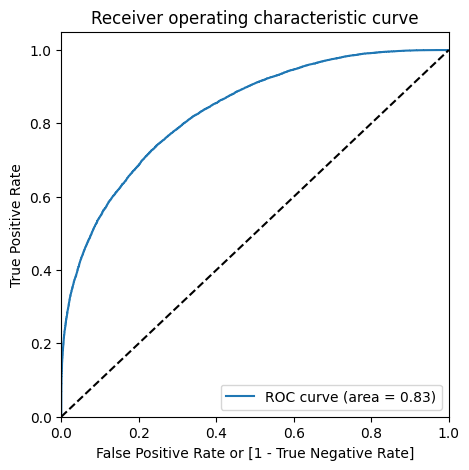

In [77]:
# Call the ROC function
draw_roc(y_train_pred_final['Stayed'], y_train_pred_final['Retention_Prob'])

The area under the curve of the ROC is 0.83 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

7.4.2 Predicting on train set at various probability cutoffs <font color="red">[1 Marks]</font>

In [78]:
# Let's create columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Retention_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Stayed,Retention_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.374985,0,1,1,1,1,0,0,0,0,0,0
1,1,0.948432,1,1,1,1,1,1,1,1,1,1,1
2,0,0.666945,1,1,1,1,1,1,1,1,0,0,0
3,0,0.449593,0,1,1,1,1,1,0,0,0,0,0
4,0,0.818956,1,1,1,1,1,1,1,1,1,1,0


7.4.3 Plot for Accuracy, Sensitivity, Specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [79]:
# Let's create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Stayed'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521418  1.000000  0.000000
0.1   0.1  0.599324  0.994880  0.168364
0.2   0.2  0.671891  0.961134  0.356759
0.3   0.3  0.714060  0.908033  0.502726
0.4   0.4  0.738067  0.840231  0.626759
0.5   0.5  0.745733  0.758388  0.731944
0.6   0.6  0.738088  0.662775  0.820141
0.7   0.7  0.716912  0.553198  0.895280
0.8   0.8  0.670860  0.410380  0.954655
0.9   0.9  0.594895  0.230596  0.991802


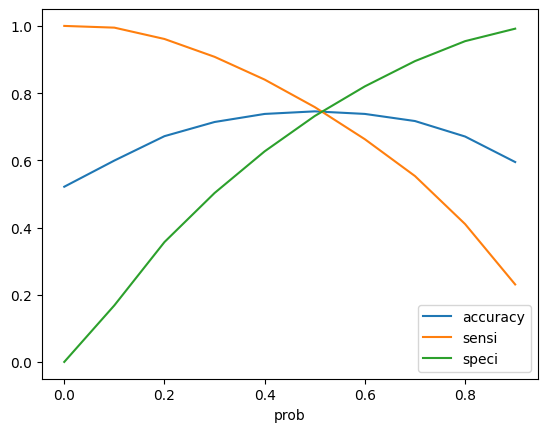

In [80]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.52, you get the optimal values of the three metrics. So let's choose 0.52 as our cutoff now.

7.4.4 Create a column for final prediction basis optimal cutoff <font color="red">[2 Marks]</font>

In [81]:
# Create a column for final prediction basis optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final['Retention_Prob'].map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

,Stayed,Retention_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.374985,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.948432,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.666945,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.449593,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.818956,1,1,1,1,1,1,1,1,1,1,0,1


7.4.5 Calculate model's accuracy <font color="red">[1 Marks]</font>

In [82]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final['Stayed'], y_train_pred_final['final_predicted'])

0.7463595178383626

7.4.6 Create Confusion Matrix <font color="red">[1 Marks]</font>

In [83]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final['Stayed'], y_train_pred_final['final_predicted'] )
confusion2

array([[17787,  5876],
       [ 6665, 19116]])

7.4.7 Create variables for True Positive, True Negative, False Positive and False Negative <font color="red">[1 Marks]</font>

In [84]:
# Let's evaluate the other metrics as well
TP2 = confusion2[1,1] # true positive
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

7.4.8 Calculate Sensitivity of the model <font color="red">[1 Marks]</font>

In [85]:
# Calculate Sensitivity
TP2/(TP2+FN2)

np.float64(0.7414762809821186)

7.4.9 Calculate Specificity of the model <font color="red">[1 Marks]</font>

In [86]:
# Calculate Specificity
TN2/(TN2+FP2)

np.float64(0.7516798377213371)

7.4.10 Calculate Precision of the model <font color="red">[1 Marks]</font>

In [87]:
# Precision
TP2 / (TP2 + FP2)

np.float64(0.7648847631241997)

7.4.11 Calculate Recall of the model <font color="red">[1 Marks]</font>

In [88]:
# Recall
TP2 / (TP2 + FN2)

np.float64(0.7414762809821186)

**Precision and Recall tradeoff:**

Let's check Optimal coefficient value by looking at precision-recall curve, and adjusting the cutoff basis precision and recall tradeoff if required.

In [89]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [90]:
# Check actual and predicted values from initial model
y_train_pred_final[['Stayed','Retention_Prob']].head()

,Stayed,Retention_Prob
0,1,0.374985
1,1,0.948432
2,0,0.666945
3,0,0.449593
4,0,0.818956


7.4.12 Create Precision-Recall Curve <font color="red">[2 Marks]</font>

In [91]:
# Create precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Stayed'], y_train_pred_final['Retention_Prob'])

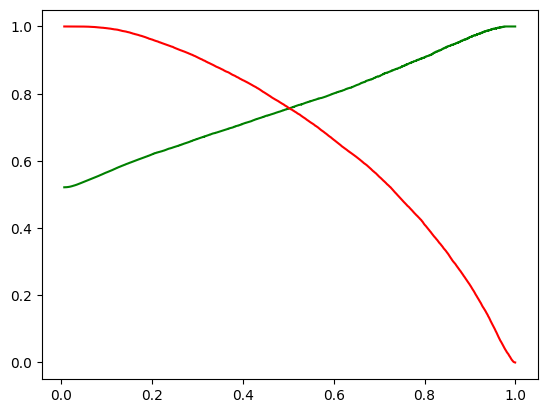

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Since the intersection happens at about `0.5`, we are good with our current model.

## Step 8: Prediction and Model Evaluation <font color = red>[25 marks]</font>

Using the model built in the previous step, let's make predictions on the validation set with optimal cutoff. We would then look at metrics including accuracy, sensitivity, specificity, precision and recall to evaluate our model.

##### 8.1 Make predictions over validation set <font color = red>[15 marks]</font>

8.1.1 Apply feature scaling on validation set so that all the numerical features are in similar scale <font color="Red">[2 Marks]</font>

In [93]:
# Scale the validation set as well using just 'transform'
X_validation[['Age','Years at Company',
         'Monthly Income','Number of Promotions',
         'Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']] = scaler.transform(X_validation[['Age','Years at Company',
                                                                        'Monthly Income','Number of Promotions',
                                                                        'Distance from Home',
                                                                        'Number of Dependents',
                                                                        'Company Tenure (In Months)']])
X_validation.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
38726,0.097561,0.08,0.153720,0.50,0.316327,0.066667,0.269841,0,0,1,...,0,0,0,1,0,1,0,0,0,1
24574,0.609756,0.36,0.150317,0.50,0.377551,0.266667,0.261905,0,0,0,...,0,0,0,0,0,1,0,1,0,0
21775,0.512195,0.02,0.086291,0.25,0.397959,0.066667,0.373016,1,0,0,...,1,0,0,1,0,0,0,1,0,0
42700,0.292683,0.20,0.137011,0.50,0.204082,0.000000,0.333333,1,0,0,...,1,0,0,0,1,0,0,0,0,0
60433,0.756098,0.72,0.085286,0.25,0.122449,0.000000,0.603175,0,0,0,...,1,0,0,0,0,1,0,0,1,0


8.1.2 Select the required column using previously created variable 'col' <font color="red">[1 Marks]</font>

In [94]:
# Drop columns from X_validation which are not required. As we have already stored the list of columns in variable, we can use that.
X_validation = X_validation[col]
X_validation.head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
38726,0.08,0.50,0.316327,0.066667,0,0,0,0,0,0,0,1,0,0,0
24574,0.36,0.50,0.377551,0.266667,0,0,0,0,0,0,0,1,0,0,0
21775,0.02,0.25,0.397959,0.066667,1,0,1,0,0,1,1,0,0,0,0
42700,0.20,0.50,0.204082,0.000000,1,0,0,0,0,0,0,0,0,1,0
60433,0.72,0.25,0.122449,0.000000,0,0,0,0,0,1,0,0,0,0,0


8.1.3 Add constant to X_validation <font color="red">[2 Marks]</font>

In [95]:
# Adding constant of X_validation
X_validation_sm = sm.add_constant(X_validation)
X_validation_sm.head()

,const,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
38726,1.0,0.08,0.50,0.316327,0.066667,0,0,0,0,0,0,0,1,0,0,0
24574,1.0,0.36,0.50,0.377551,0.266667,0,0,0,0,0,0,0,1,0,0,0
21775,1.0,0.02,0.25,0.397959,0.066667,1,0,1,0,0,1,1,0,0,0,0
42700,1.0,0.20,0.50,0.204082,0.000000,1,0,0,0,0,0,0,0,0,1,0
60433,1.0,0.72,0.25,0.122449,0.000000,0,0,0,0,0,1,0,0,0,0,0


8.1.4 Make Predictions over validation set <font color="red">[2 Marks]</font>

In [96]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_validation_sm)

8.1.5 View Predictions <font color="red">[1 Marks]</font>

In [97]:
# View predictions
y_validation_pred[:10]

38726    0.938217
24574    0.965812
21775    0.151281
42700    0.562059
60433    0.222955
20041    0.500238
63567    0.802380
41761    0.228714
65927    0.650862
63897    0.400691
dtype: float64

8.1.6 Convert predictions to DataFrame <font color="red">[1 Marks]</font>

In [98]:
# Convert 'y_validation_pred' to a DataFrame 'y_pred_1'
y_pred_1 = pd.DataFrame(y_validation_pred)
y_pred_1.head()

,0
38726,0.938217
24574,0.965812
21775,0.151281
42700,0.562059
60433,0.222955


8.1.7 Create DataFrame with actual values and predicted values for validation set <font color="red">[3 Marks]</font>

In [99]:
# Convert 'y_validation' to DataFrame 'y_validation_df'
y_validation_df = pd.DataFrame(y_validation)

In [100]:
# Remove index from both DataFrames 'y_pred_1' and 'y_validation_df' to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_validation_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_validation_df, y_pred_1],axis=1)
y_pred_final.head()

,Attrition_Stayed,0
0,1,0.938217
1,1,0.965812
2,1,0.151281
3,1,0.562059
4,0,0.222955


8.1.8 Rename predicted probability column <font color="red">[1 Marks]</font>

In [101]:
# Rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Retention_Prob'})

8.1.9 Predict final prediction basis cutoff value <font color="red">[2 Marks]</font>

In [102]:
# Make predictions on the validation set using the optimal cutoff of 0.52
y_pred_final['final_predicted'] = y_pred_final['Retention_Prob'].map(lambda x: 1 if x > 0.52 else 0)

In [103]:
# Check y_pred_final
y_pred_final.head()

,Attrition_Stayed,Retention_Prob,final_predicted
0,1,0.938217,1
1,1,0.965812,1
2,1,0.151281,0
3,1,0.562059,1
4,0,0.222955,0


##### 8.2 Calculate Accuracy Of Model <font color = red>[1 marks]</font>

In [104]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Attrition_Stayed'], y_pred_final['final_predicted'])

0.7435231938086924

The accuracy of the model is 74%. Let's look at other metrics as well.

##### 8.3 Create Confusion Matrix <font color = red>[3 marks]</font>

In [105]:
confusion2 = metrics.confusion_matrix(y_pred_final['Attrition_Stayed'], y_pred_final['final_predicted'])
confusion2

array([[7609, 2553],
       [2882, 8147]])

In [106]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### 8.4 Calculate Sensitivity and Specificity <font color = red>[3 marks]</font>

In [107]:
# Calculate sensitivity
TP / float(TP+FN)

np.float64(0.7386889110526793)

In [108]:
# Calculate specificity
TN / float(TN+FP)

np.float64(0.748769927179689)

##### 8.5 Calculate Precision and Recall <font color = red>[3 marks]</font>

In [109]:
# Calculate Precision
TP / (TP + FP)

np.float64(0.7614018691588785)

In [110]:
# Calculate Recall
TP / (TP + FN)

np.float64(0.7386889110526793)

Let's look at each metric:<br>
<li> Accuracy: Overall, 74% of the predictions are correct.
<li> Sensitivity: The model correctly identifies 74.9% of the actual positives (true positives).
<li> Specificity: The model correctly identifies 73.9% of the actual negatives (true negatives).
<li> Precision: When the model predicts a positive, 72.5% of the predictions are actually correct.
<li> Recall: Same as sensitivity: it measures how well the model captures actual positives.

## Conclusion

As the sensitivity and specificity of model are relatively close, it indicates that the model is performing fairly well at distinguishing between positive and negative classes and there is a good balance in the model. A precision of 0.725 means that ~27.5% of the positive predictions are false positives. Overall, the model is performing well over the validation set, and can be used by the company.